In [1]:
import pandas as pd
import numpy as np

In [2]:
%load_ext autotime

time: 0 ns (started: 2022-11-25 19:59:20 +05:30)


In [3]:
data_given = pd.read_csv('LAB7ML.csv')

time: 125 ms (started: 2022-11-25 19:59:21 +05:30)


In [4]:
data_given

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


time: 328 ms (started: 2022-11-25 19:59:23 +05:30)


In [5]:
import matplotlib.pyplot as plt

time: 4.51 s (started: 2022-11-25 19:59:27 +05:30)


In [6]:
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts))
    for i in range(len(elements))])
    return entropy

time: 31 ms (started: 2022-11-25 19:59:33 +05:30)


In [7]:
entropy(data_given.buys_computer)

0.9402859586706311

time: 0 ns (started: 2022-11-25 19:59:34 +05:30)


In [8]:
data_given.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            14 non-null     object
 1   income         14 non-null     object
 2   student        14 non-null     object
 3   credit_rating  14 non-null     object
 4   buys_computer  14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes
time: 125 ms (started: 2022-11-25 19:59:37 +05:30)


In [16]:
from scipy.stats import entropy
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib
import matplotlib.pyplot as plt

time: 24 s (started: 2022-11-25 21:07:48 +05:30)


In [19]:
def probability(n1,n2):
  p1 = n1 / (n1+n2)
  p2 = n2 / (n1+n2)
  prob=[p1, p2]
  return entropy(prob, base=2)

def new_entropy(column, values):
  Hs1 = 0
  for i in range(len(values)):
    new_column = data_given[data_given[str(column)] == str(values[i])]

    final_frame = new_column[new_column['buys_computer'] == 'yes'][column].count()
    
    Hs1 = Hs1 + (new_column[column].count() / data_given[column].count()) * probability(final_frame, new_column[column].count() - final_frame)
  return (Hs - Hs1)

time: 0 ns (started: 2022-11-25 21:10:14 +05:30)


In [21]:
#finding information gain
columns = list(data_given.columns)[:-1]
information_gain = []
for i in data_given.columns:
  unique_values = list(data_given[i].unique())
  val = new_entropy(i,unique_values)
  information_gain.append(val)
print(information_gain[:-1])

[0.246749819774439, 0.029222565658954758, 0.15183550136234159, 0.04812703040826938]
time: 94 ms (started: 2022-11-25 21:11:18 +05:30)


In [23]:
data_given1 = [[-1,1,0,-1,0],[-1,1,0,1,0],[0,1,0,-1,1],[1,1,0,-1,1],[1,-1,1,-1,1],
            [1,-1,1,1,0],[0,-1,1,1,1],[-1,0,0,-1,0],[-1,-1,1,-1,1],[1,0,1,-1,1],
            [-1,0,1,1,1],[0,0,0,1,1],[0,1,1,-1,1],[1,0,0,1,0]]
data_given1 = pd.DataFrame(data_given1,columns=['age','income','student','credit_rating','buys_computer'])
print(data_given1)

    age  income  student  credit_rating  buys_computer
0    -1       1        0             -1              0
1    -1       1        0              1              0
2     0       1        0             -1              1
3     1       1        0             -1              1
4     1      -1        1             -1              1
5     1      -1        1              1              0
6     0      -1        1              1              1
7    -1       0        0             -1              0
8    -1      -1        1             -1              1
9     1       0        1             -1              1
10   -1       0        1              1              1
11    0       0        0              1              1
12    0       1        1             -1              1
13    1       0        0              1              0
time: 16 ms (started: 2022-11-25 21:19:16 +05:30)


In [24]:
#splitting dataset into train and test
X = data_given1.iloc[:,:-1]
y = data_given1.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

time: 63 ms (started: 2022-11-25 21:20:11 +05:30)


In [25]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
print(clf.score(X_test, y_test))
print(clf.get_depth())

1.0
3
time: 235 ms (started: 2022-11-25 21:20:43 +05:30)


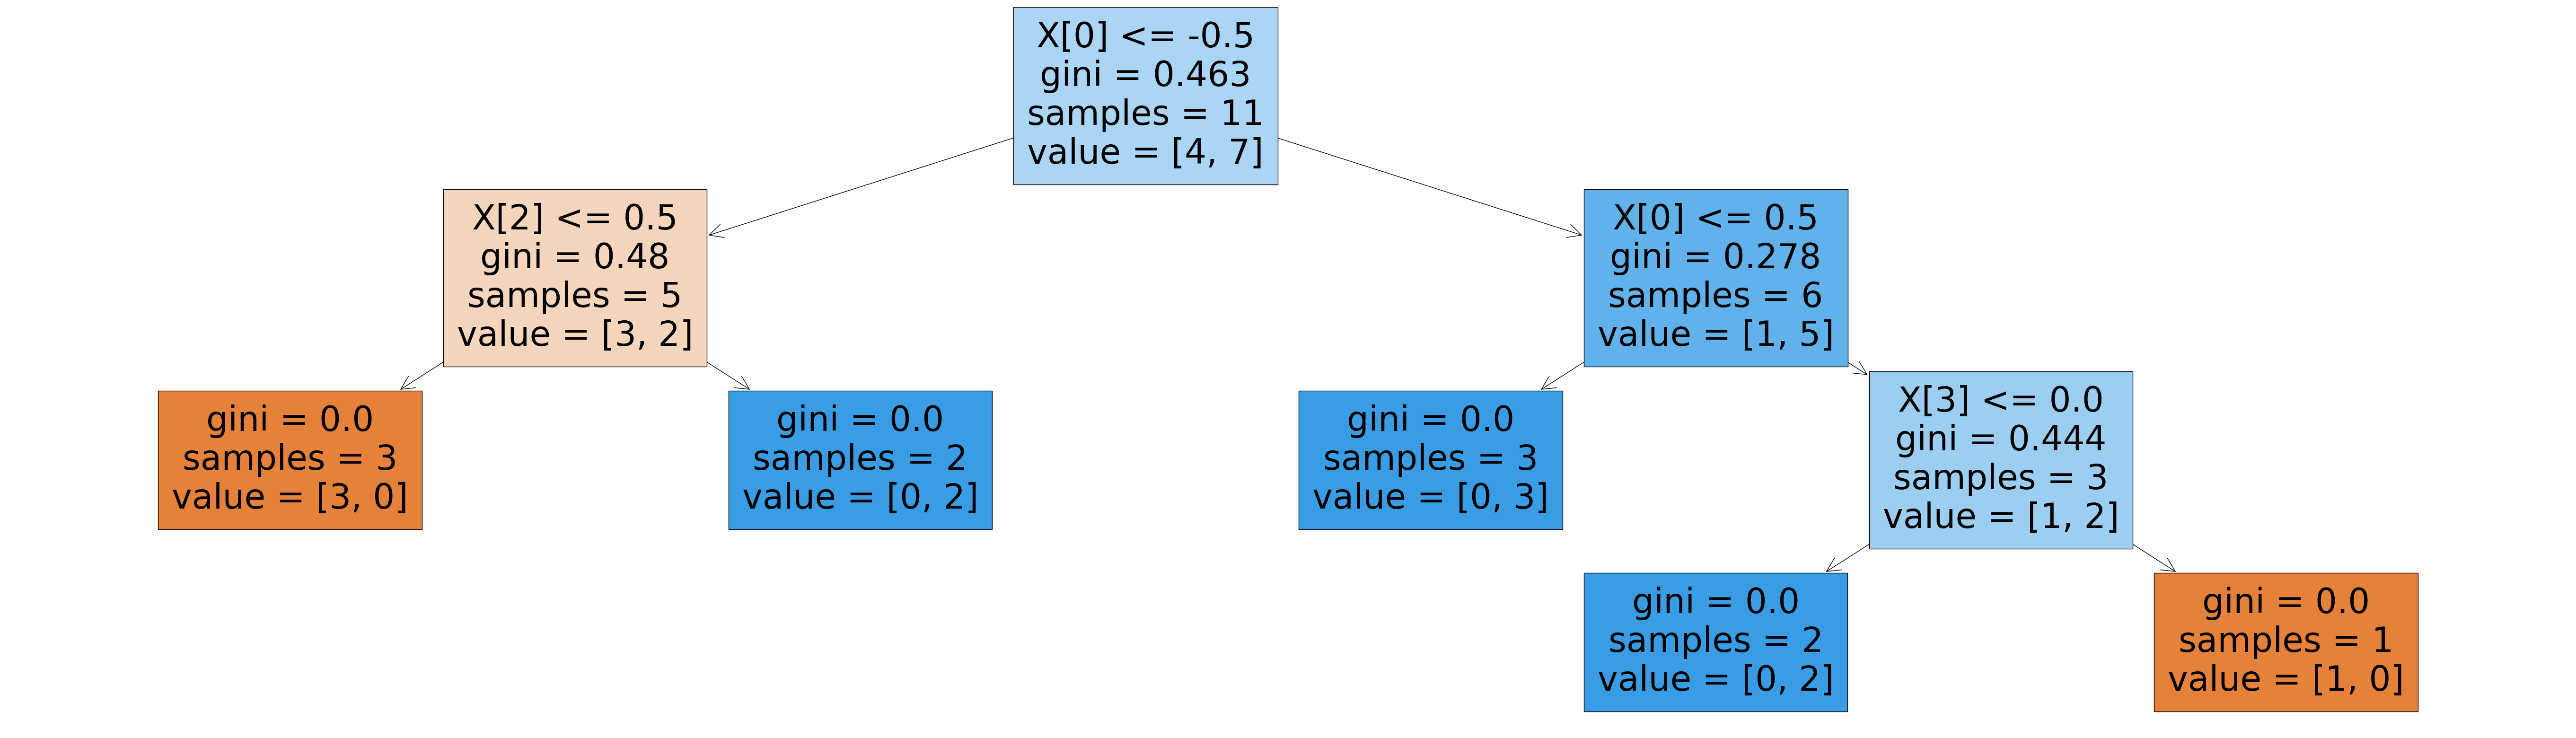

time: 953 ms (started: 2022-11-25 21:25:02 +05:30)


In [29]:
plt.figure(figsize=(70,20))
tree.plot_tree(clf, filled=True)
plt.show()

In [32]:
data_given2 = pd.read_csv('PROJECT_VC_SHEET.csv')

time: 0 ns (started: 2022-11-25 21:38:00 +05:30)


In [33]:
data_given2

,S.No,State/UT,2018,2019,2020,Mid-Year Projected Population (in Lakhs) (2020),Rate of Violent Crimes (2020),Chargesheeting Rate (2020),Total violent crime (average),pov rate(people % below the poverty line 2021-2022),literacy(2021),Sex Ratio,HDI,unemployment,Police personnel per lakh of population(Actual),MPI,Polation Density 2021 per km^2
0,1,Andhra Pradesh,8211,7670,6683,526.0,12.7,85.8,7521.3000,12.30,67.00,1045,0.649,6.4833,113.68,0.053,308
1,2,Arunachal Pradesh,622,678,414,15.2,27.2,55.1,571.3333,34.67,65.40,997,0.661,7.6000,830.31,0.115,17
2,3,Assam,29418,28696,25629,347.9,73.7,57.2,27914.3300,31.98,72.20,1012,0.613,2.5666,207.49,0.156,397
3,4,Bihar,44407,45004,51116,1219.0,41.9,81.7,46842.3300,33.74,61.80,1090,0.574,12.8083,76.20,0.265,1102
4,5,Chhattisgarh,8669,7823,8033,292.4,27.5,80.7,8175.0000,39.93,70.30,1015,0.611,3.9166,220.53,0.134,189
5,6,Goa,452,415,316,15.5,20.3,80.4,394.3333,3.76,88.70,1027,0.763,16.7666,511.78,0.015,394
6,7,Gujarat,11358,9453,8337,691.7,12.1,88.6,9716.0000,16.63,78.00,965,0.672,2.0500,122.78,0.084,308
7,8,Haryana,14018,12812,12128,292.1,41.5,59.5,12986.0000,12.30,84.10,926,0.708,28.4475,180.19,0.055,573
8,9,Himachal Pradesh,1861,1833,1817,73.6,24.7,77.4,1837.0000,7.62,82.80,1040,0.725,11.8166,240.52,0.030,123
9,10,Jharkhand,11617,12187,14185,381.2,37.2,82.7,12663.0000,36.96,66.40,1050,0.598,13.8833,172.18,0.202,414


time: 31 ms (started: 2022-11-25 21:38:05 +05:30)


In [34]:
data_given2.describe()

,S.No,2018,2019,2020,Mid-Year Projected Population (in Lakhs) (2020),Rate of Violent Crimes (2020),Chargesheeting Rate (2020),Total violent crime (average),pov rate(people % below the poverty line 2021-2022),literacy(2021),Sex Ratio,HDI,unemployment,Police personnel per lakh of population(Actual),MPI,Polation Density 2021 per km^2
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,17.500000,12589.058824,12286.294118,11762.441176,397.670588,26.173529,72.167647,12212.596956,18.285000,77.607059,1022.588235,0.680735,8.738921,371.569706,0.081324,1050.058824
std,9.958246,16127.760621,15259.666894,15326.839438,492.834561,14.024747,18.260069,15504.503058,12.181033,8.837098,61.318403,0.056233,6.497299,321.951370,0.065335,2415.996287
min,1.000000,6.000000,16.000000,5.000000,0.700000,5.600000,16.900000,9.000000,0.710000,61.800000,913.000000,0.574000,1.500000,76.200000,0.003000,17.000000
25%,9.250000,631.000000,674.250000,437.000000,24.200000,16.125000,63.475000,581.583300,9.717500,69.550000,975.000000,0.643000,4.035350,131.622500,0.024500,146.250000
50%,17.500000,7931.500000,7746.500000,7358.000000,292.250000,22.900000,76.300000,7844.150000,15.755000,78.400000,1017.500000,0.683000,7.358300,214.010000,0.062000,315.500000
75%,25.750000,15470.750000,15536.750000,14508.250000,630.250000,31.025000,82.450000,15415.752500,31.102500,85.375000,1049.750000,0.722250,11.706200,553.990000,0.129750,568.500000
max,34.000000,65155.000000,55519.000000,51983.000000,2289.300000,73.700000,100.000000,57552.330000,39.930000,94.000000,1187.000000,0.782000,28.447500,1300.930000,0.265000,11297.000000


time: 141 ms (started: 2022-11-25 21:38:18 +05:30)


In [35]:
def explore(row: float):
  if row >= 26.173529:
    return 'high'
  else:
    return 'low'

Rate = data_given['Rate of Violent Crimes (2020)'].tolist()
classified_data = []
for i in Rate:
  classified_data.append(explore(i))

data_given['class']=classified_data
print(data_given)

    S.No           State/UT   2018   2019   2020  \
0      1     Andhra Pradesh   8211   7670   6683   
1      2  Arunachal Pradesh    622    678    414   
2      3              Assam  29418  28696  25629   
3      4              Bihar  44407  45004  51116   
4      5       Chhattisgarh   8669   7823   8033   
5      6                Goa    452    415    316   
6      7            Gujarat  11358   9453   8337   
7      8            Haryana  14018  12812  12128   
8      9   Himachal Pradesh   1861   1833   1817   
9     10          Jharkhand  11617  12187  14185   
10    11          Karnataka  17616  16445  14616   
11    12             Kerala  13133  12736  10255   
12    13     Madhya Pradesh  27106  24972  23287   
13    14        Maharashtra  45706  44074  39162   
14    15            Manipur    658    673    506   
15    16          Meghalaya    662    678    530   
16    17            Mizoram    161    163    161   
17    18           Nagaland    233    181    123   
18    19    

In [37]:
#scaling the data
scaler = MinMaxScaler(feature_range=(0,10))
data_given2[[' Rate of Violent Crimes (2020)','Chargesheeting Rate (2020)','Total violent crime (average)','pov rate(people % below the poverty line 2021-2022)','literacy(2021)','Sex Ratio','HDI','unemployment','Police personnel per lakh of population(Actual)','MPI','Polation Density 2021 per km^2']] = scaler.fit_transform(data_given[['Rate of Violent Crimes (2020)','Chargesheeting Rate (2020)','Total violent crime (average)','pov rate(people % below the poverty line 2021-2022)','literacy(2021)','Sex Ratio','HDI','unemployment','Police personnel per lakh of population(Actual)','MPI','Polation Density 2021 per km^2']])
data = data_given2
data

,S.No,State/UT,2018,2019,2020,Mid-Year Projected Population (in Lakhs) (2020),Rate of Violent Crimes (2020),Chargesheeting Rate (2020),Total violent crime (average),pov rate(people % below the poverty line 2021-2022),literacy(2021),Sex Ratio,HDI,unemployment,Police personnel per lakh of population(Actual),MPI,Polation Density 2021 per km^2,Rate of Violent Crimes (2020)
0,1,Andhra Pradesh,8211,7670,6683,526.0,12.7,8.291215,1.305503,2.955125,1.614907,4.817518,3.605769,1.849262,0.306027,1.908397,0.257979,1.042584
1,2,Arunachal Pradesh,622,678,414,15.2,27.2,4.596871,0.097723,8.658848,1.118012,3.065693,4.182692,2.263661,6.157357,4.274809,0.000000,3.171806
2,3,Assam,29418,28696,25629,347.9,73.7,4.849579,4.849446,7.972973,3.229814,3.613139,1.875000,0.395807,1.071991,5.839695,0.336879,10.000000
3,4,Bihar,44407,45004,51116,1219.0,41.9,7.797834,8.138794,8.421724,0.000000,6.459854,0.000000,4.196419,0.000000,10.000000,0.961879,5.330396
4,5,Chhattisgarh,8669,7823,8033,292.4,27.5,7.677497,1.419105,10.000000,2.639752,3.722628,1.778846,0.896781,1.178464,5.000000,0.152482,3.215859
5,6,Goa,452,415,316,15.5,20.3,7.641396,0.066964,0.777664,8.354037,4.160584,9.086538,5.665312,3.556539,0.458015,0.334220,2.158590
6,7,Gujarat,11358,9453,8337,691.7,12.1,8.628159,1.686903,4.059153,5.031056,1.897810,4.711538,0.204101,0.380329,3.091603,0.257979,0.954479
7,8,Haryana,14018,12812,12128,292.1,41.5,5.126354,2.255170,2.955125,6.925466,0.474453,6.442308,10.000000,0.849085,1.984733,0.492908,5.271659
8,9,Himachal Pradesh,1861,1833,1817,73.6,24.7,7.280385,0.317674,1.761856,6.521739,4.635036,7.259615,3.828407,1.341683,1.030534,0.093972,2.804699
9,10,Jharkhand,11617,12187,14185,381.2,37.2,7.918171,2.199039,9.242733,1.428571,5.000000,1.153846,4.595343,0.783683,7.595420,0.351950,4.640235


time: 47 ms (started: 2022-11-25 21:40:01 +05:30)


In [38]:
feature = data.iloc[:, 3:17] #for new feature vector

time: 0 ns (started: 2022-11-25 21:41:02 +05:30)


In [46]:
#Now we are splitting in to test and train
#splitting into test and train
X = feature
y = data_given['class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(X)

     2019   2020  Mid-Year Projected Population (in Lakhs) (2020)  \
0    7670   6683                                            526.0   
1     678    414                                             15.2   
2   28696  25629                                            347.9   
3   45004  51116                                           1219.0   
4    7823   8033                                            292.4   
5     415    316                                             15.5   
6    9453   8337                                            691.7   
7   12812  12128                                            292.1   
8    1833   1817                                             73.6   
9   12187  14185                                            381.2   
10  16445  14616                                            665.0   
11  12736  10255                                            353.7   
12  24972  23287                                            837.6   
13  44074  39162                  

In [47]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(X_train,y_train)
print("Training data accuracy: ", clf1.score(X_train, y_train))
print("Test data accuracy: ", clf1.score(X_test,y_test))
print(clf1.get_depth())

Training data accuracy:  1.0
Test data accuracy:  1.0
1
time: 16 ms (started: 2022-11-25 21:44:54 +05:30)


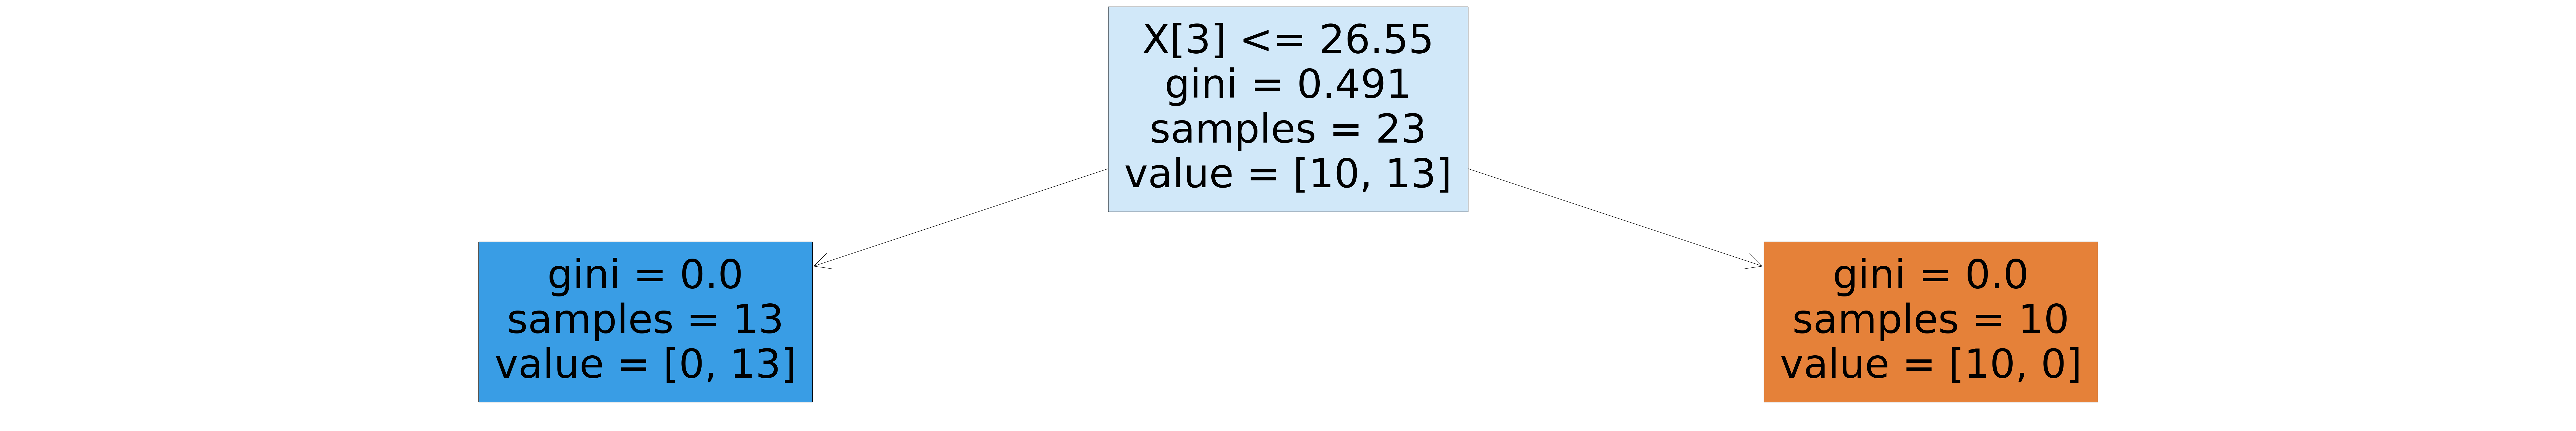

time: 1.42 s (started: 2022-11-25 23:21:52 +05:30)


In [53]:
plt.figure(figsize=(120,20))
tree.plot_tree(clf1, filled=True)
plt.show()

In [49]:
clf2 = DecisionTreeClassifier(max_depth=5)
clf2 = clf2.fit(X_train,y_train)
print("Training data accuracy: ", clf2.score(X_train, y_train))
print("Test data accuracy: ", clf2.score(X_test,y_test))
print(clf2.get_depth())

Training data accuracy:  1.0
Test data accuracy:  1.0
1
time: 0 ns (started: 2022-11-25 21:46:28 +05:30)


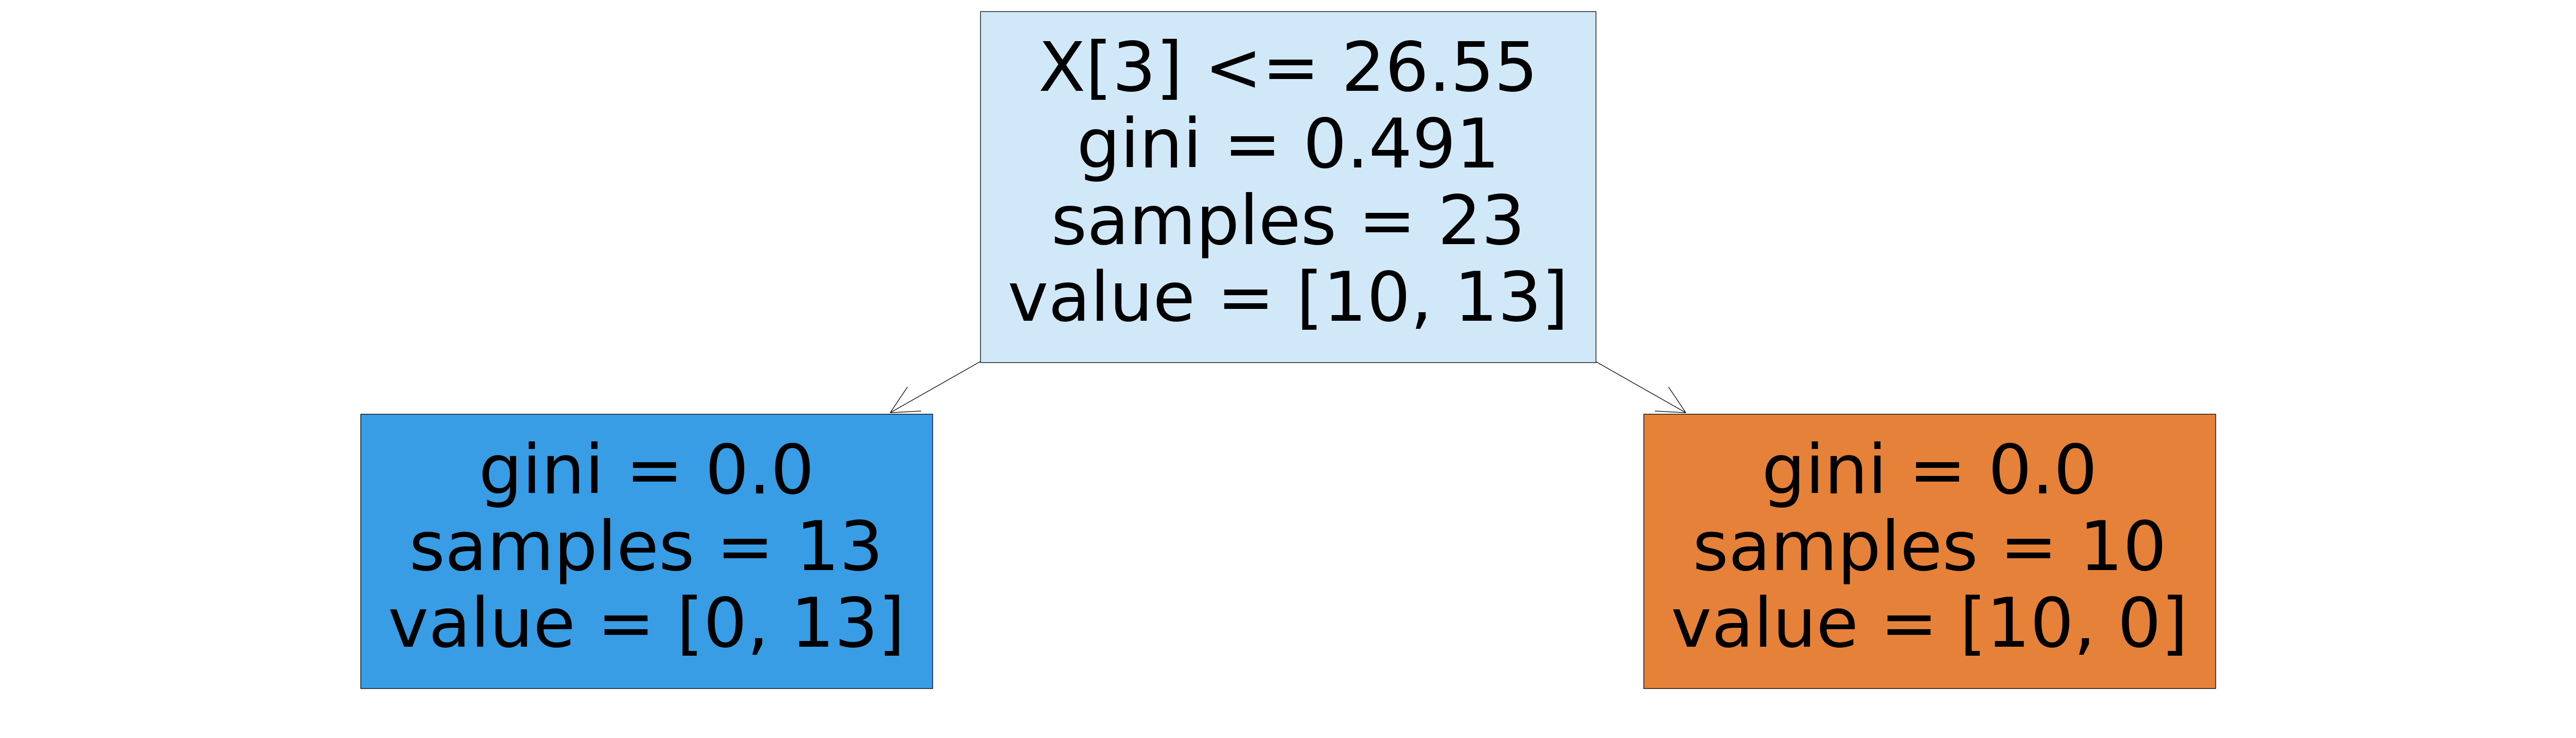

time: 672 ms (started: 2022-11-25 21:46:42 +05:30)


In [50]:
plt.figure(figsize=(70,20))
tree.plot_tree(clf2, filled=True)
plt.show()

In [51]:
clf3 = DecisionTreeClassifier(criterion='entropy')
clf3 = clf3.fit(X_train,y_train)
print("Training data accuracy: ", clf3.score(X_train, y_train))
print("Test data accuracy: ", clf3.score(X_test,y_test))
print(clf3.get_depth())

Training data accuracy:  1.0
Test data accuracy:  1.0
1
time: 16 ms (started: 2022-11-25 21:47:22 +05:30)


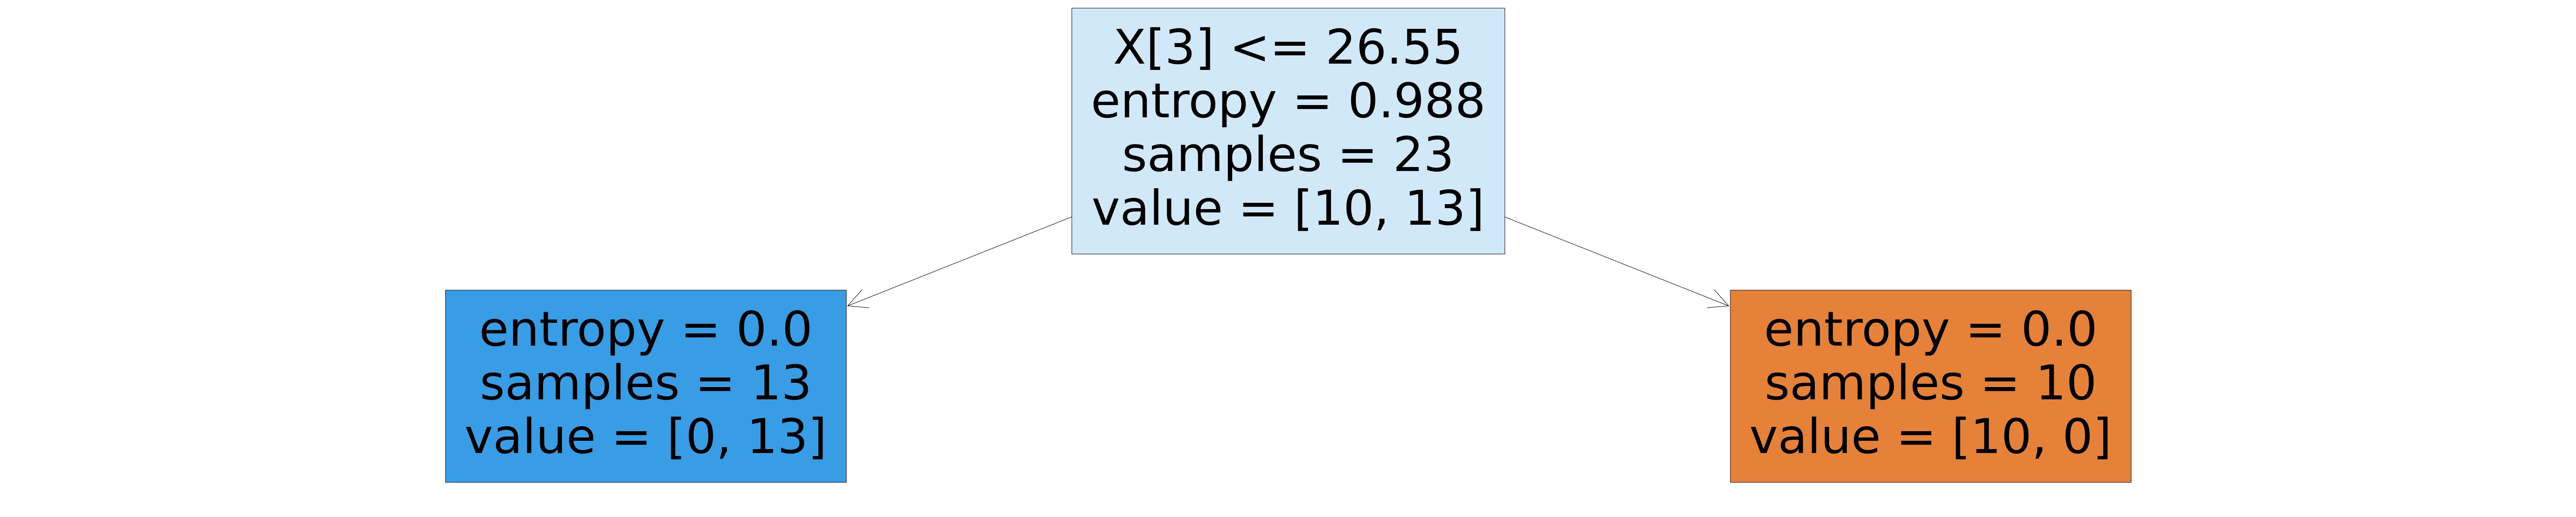

time: 1 s (started: 2022-11-25 21:47:52 +05:30)


In [52]:
plt.figure(figsize=(100,20))
tree.plot_tree(clf3, filled=True)
plt.show()